# **TikTok**


# **Exploratory data analysis**


**The purpose** of this Notebook is to perform exploratory data analysis on the provided TikTok dataset. Of particular focus is the examination of factors that differentiate claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.

*This Notebook has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **PACE stages**



## **PACE: Plan**

Consider the following questions:

What methods are best for identifying outliers?

* To identify outliers, one can use the pandas library to get the means and medians, also the matplotlib library to create boxplots.

How do you make the decision to keep or exclude outliers from any future models?
* It depends: The outliers should be erased when they are errors. But, most of the times, they can be trasnformed to the median or to a wall that is equal to certain percentil. Also, they could remain untouched to create later a model resistant to outliers.

### **Task 1. Imports, links, and loading**



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path_main = '/content/drive/MyDrive/Data Analytics/Main Projects/TikTok project/tiktok_dataset.csv'
df = pd.read_csv(file_path_main)

## **PACE: Analyze**


### **Task 2a: Data exploration and cleaning**


Exploring Basic Characteristics of the DataFrame:

In [8]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [10]:
df.shape

(19382, 12)

In [9]:
df.size

232584

In [12]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


### **Task 2c. Select visualization type(s)**

* We can discard the video Id, #, and video_transcription_text columns.
* There are missing data: claim_status and all the counts columns.
* In order to exmine the distribution, median, ranges, tendencies and outliers we can plot histograms and boxplots.

## **PACE: Construct**

### **Task 3. Build visualizations**


#### **video_duration_sec**

Creating a box plot to examine the spread of values in the `video_duration_sec` column:

Median: 32.0


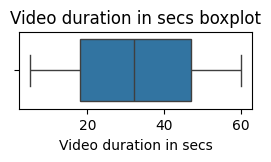

In [13]:
plt.figure(figsize=(3,1))
sns.boxplot(x=df["video_duration_sec"])
plt.xlabel("Video duration in secs")
plt.title("Video duration in secs boxplot")
print(f"Median: {df['video_duration_sec'].median()}")
plt.show()


Creating a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable:

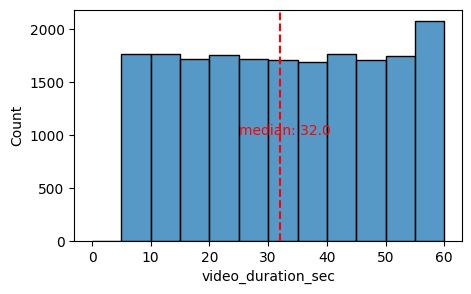

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(x=df["video_duration_sec"],bins=range(0,61,5))
median = df["video_duration_sec"].median()
plt.axvline(median,color="red",linestyle="--")
plt.text(25,1000,f"median: {median}",color = "red")
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?

* It's simmetric.

#### **video_view_count**

Creating a box plot to examine the spread of values in the `video_view_count` column:

Median: 9954.5


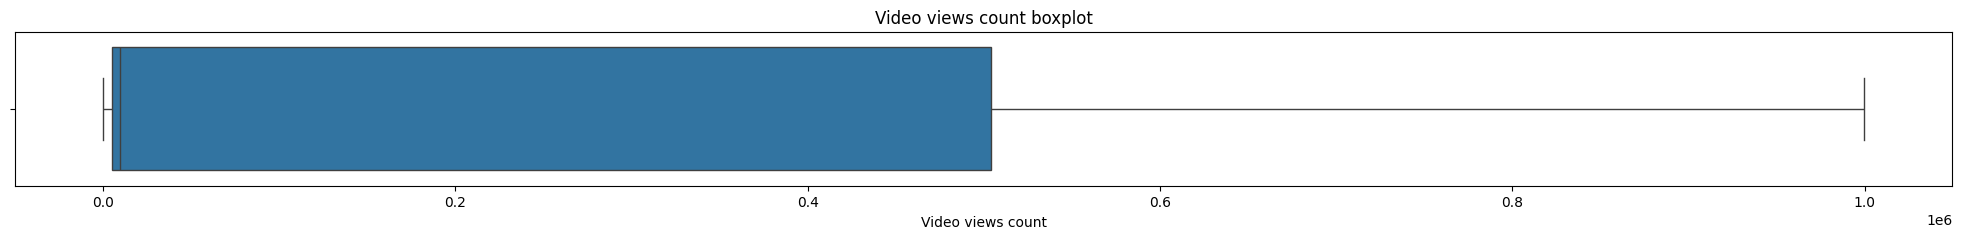

In [15]:
plt.figure(figsize=(25,2))
sns.boxplot(x=df["video_view_count"])
plt.xlabel("Video views count")
plt.title("Video views count boxplot")
print(f"Median: {df['video_view_count'].median()}")
plt.show()



Creating a histogram of the values in the `video_view_count` column to further explore the distribution of this variable:

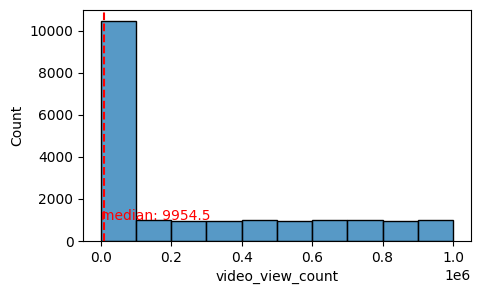

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(x=df["video_view_count"],bins=range(0,(10**6+1),10**5))
median = df["video_view_count"].median()
plt.axvline(median,color="red",linestyle="--")
plt.text(25,1000,f"median: {median}",color = "red")
plt.show()


**Question:** What do you notice about the distribution of this variable?

* This variable is right skewed and concentrates 50% of the videos under the 10 000 mark. Distribution of view counts > 100,000 views is uniform.

#### **video_like_count**

Creating a box plot to examine the spread of values in the `video_like_count` column:

Median: 3403.5


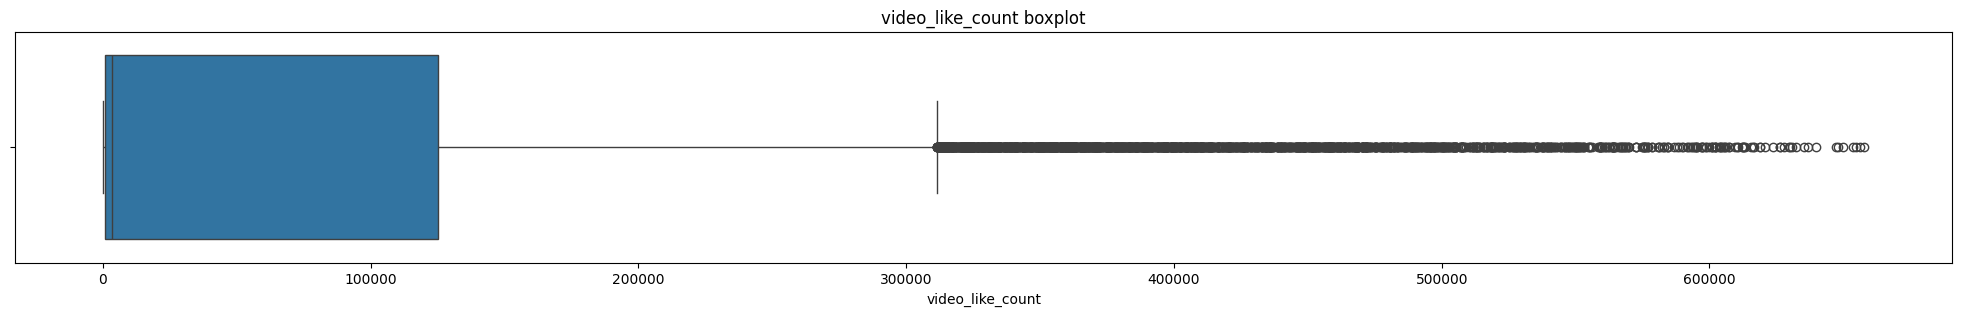

In [17]:
plt.figure(figsize=(25,3))
sns.boxplot(x=df["video_like_count"])
plt.xlabel("video_like_count")
plt.title("video_like_count boxplot")
print(f"Median: {df['video_like_count'].median()}")
plt.show()

Creating a histogram of the values in the `video_like_count` column to further explore the distribution of this variable:

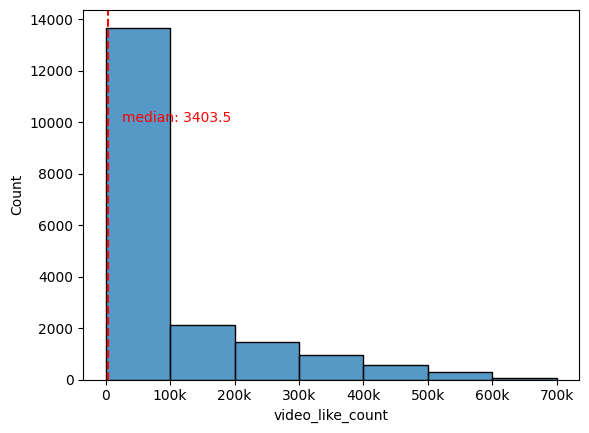

In [18]:
ax = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ticks = range(0, 7 * 10 ** 5 + 1, 10 ** 5)

labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]

ax.set_xticks(ticks)

ax.set_xticklabels(labels)
median = df["video_like_count"].median()
plt.axvline(median,color="red",linestyle="--")
plt.text(25000,10000,f"median: {median}",color = "red")
plt.show()




**Question:** What do you notice about the distribution of this variable?

* This variable is right skewed and concentrates the 50% of videos under the 3400 mark. Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

#### **video_comment_count**

Creating a box plot to examine the spread of values in the `video_comment_count` column:

Median: 9.0


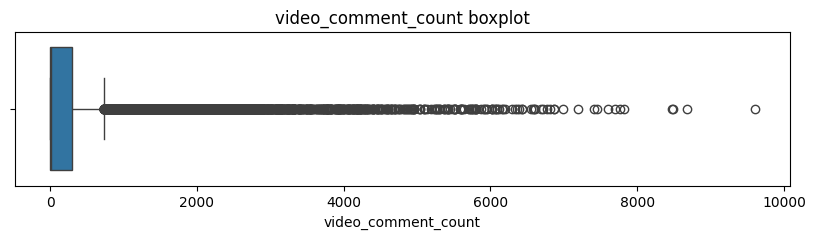

In [19]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df["video_comment_count"])
plt.xlabel("video_comment_count")
plt.title("video_comment_count boxplot")
print(f"Median: {df['video_comment_count'].median()}")
plt.show()

Creating a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable:

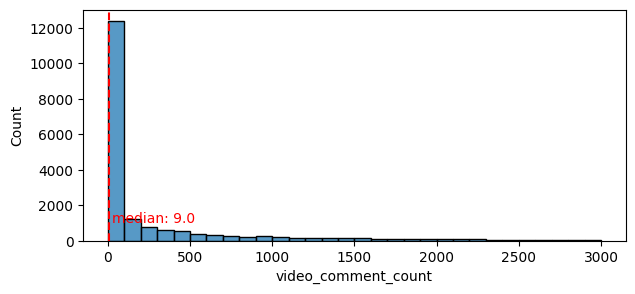

In [21]:
plt.figure(figsize=(7,3))
sns.histplot(x=df["video_comment_count"],bins=range(0,(3001),100))
median = df["video_comment_count"].median()
plt.axvline(median,color="red",linestyle="--")
plt.text(25,1000,f"median: {median}",color = "red")
plt.show()


**Question:** What do you notice about the distribution of this variable?

* Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

#### **video_share_count**

Creating a box plot to examine the spread of values in the `video_share_count` column:

Median: 717.0


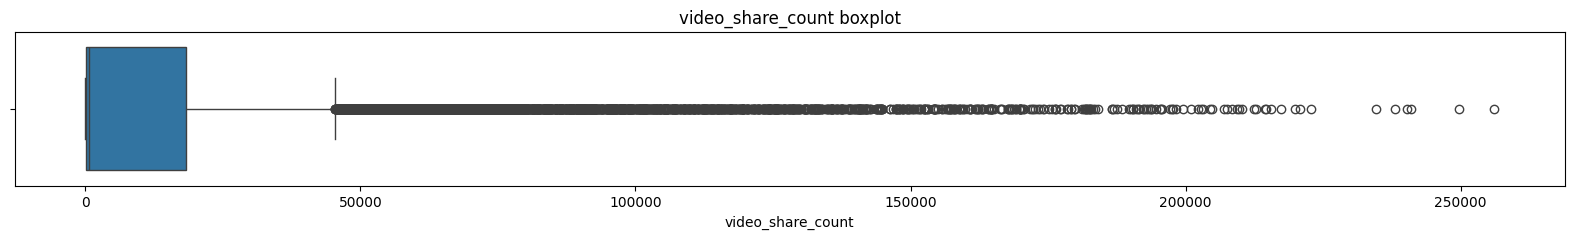

In [22]:
plt.figure(figsize=(20,2))
sns.boxplot(x=df["video_share_count"])
plt.xlabel("video_share_count")
plt.title("video_share_count boxplot")
print(f"Median: {df['video_share_count'].median()}")
plt.show()

Creating a histogram of the values in the `video_share_count` column to further explore the distribution of this variable:

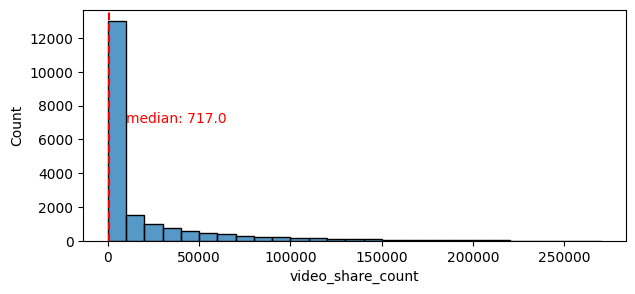

In [24]:
plt.figure(figsize=(7,3))
sns.histplot(x=df["video_share_count"],bins=range(0,(270001),10000))
median = df["video_share_count"].median()
plt.axvline(median,color="red",linestyle="--")
plt.text(10000,7000,f"median: {median}",color = "red")
plt.show()

**Question:** What do you notice about the distribution of this variable?

* The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

#### **video_download_count**

Creating a box plot to examine the spread of values in the `video_download_count` column:

Median: 46.0


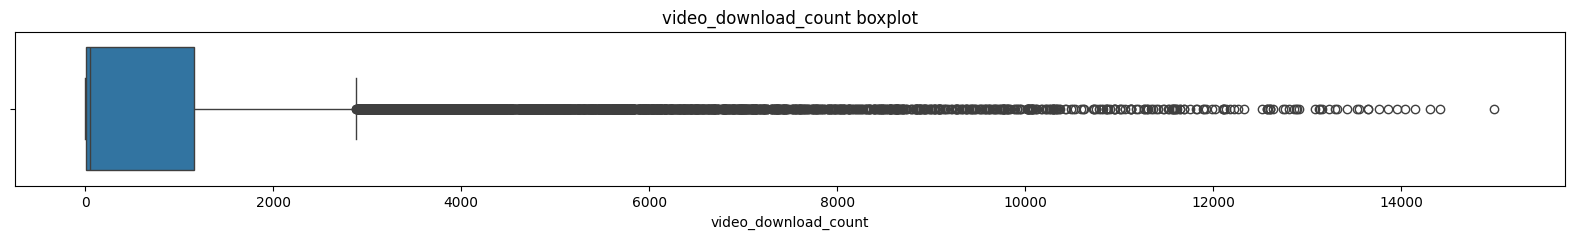

In [25]:
plt.figure(figsize=(20,2))
sns.boxplot(x=df["video_download_count"])
plt.xlabel("video_download_count")
plt.title("video_download_count boxplot")
print(f"Median: {df['video_download_count'].median()}")
plt.show()

Creating a histogram of the values in the `video_download_count` column to further explore the distribution of this variable:

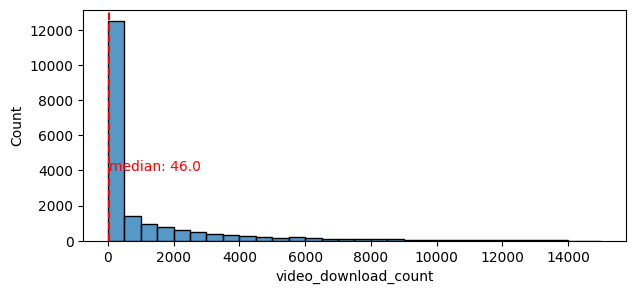

In [27]:
plt.figure(figsize=(7,3))
sns.histplot(x=df["video_download_count"],bins=range(0,(15001),500))
median = df["video_download_count"].median()
plt.axvline(median,color="red",linestyle="--")
plt.text(25,4000,f"median: {median}",color = "red")
plt.show()

**Question:** What do you notice about the distribution of this variable?
* The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### **Claim status by verification status**

Creating a histogram with four bars: one for each combination of claim status and verification status:

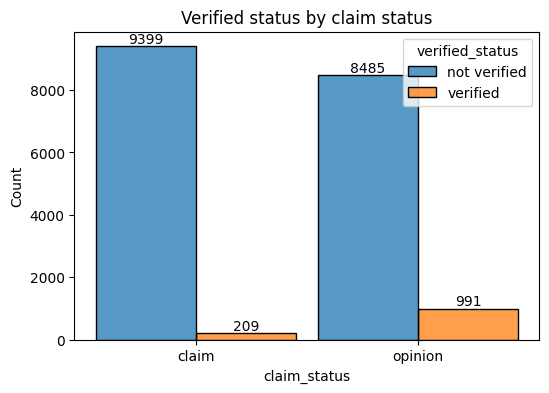

In [30]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data = df,x = "claim_status",hue="verified_status",multiple="dodge",shrink=0.9)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Verified status by claim status")
plt.show()

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

* The verified users are far fewer than the unverified. Also, there are 5x times more verified opinions than verified claims.
* The not verified users who give opinion are 9x times the verified.
* The not verified users who give claims are 45x times the verified.

#### **Claim status by author ban status**


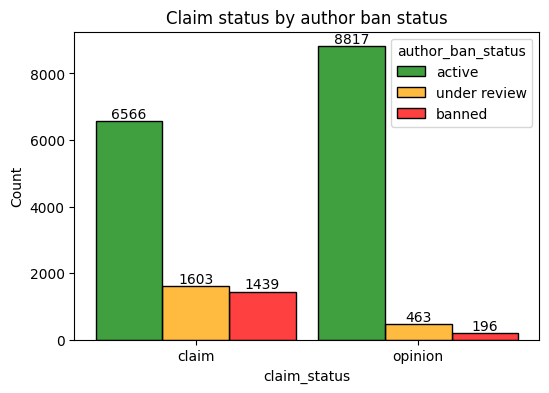

In [31]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data = df,x = "claim_status",hue="author_ban_status",multiple="dodge",shrink=0.9,hue_order=['active', 'under review', 'banned'],palette={'active':'green', 'under review':'orange', 'banned':'red'})
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Claim status by author ban status")
plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?
* About claims, the active autors are 5x times more than the banned.
* About opinions, the active autors are 45x times more than the banned.

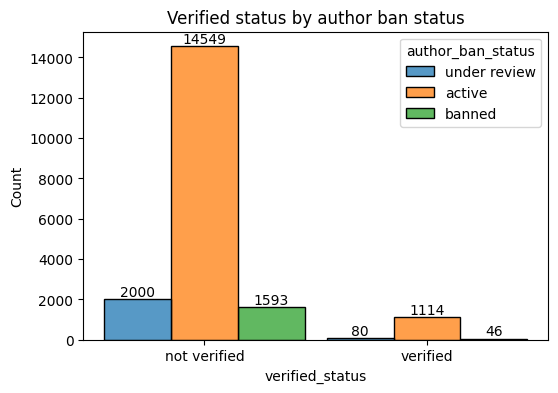

In [32]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data = df,x = "verified_status",hue="author_ban_status",multiple="dodge",shrink=0.9)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Verified status by author ban status")
plt.show()

#### **Median view counts by ban status**

Creating a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status:

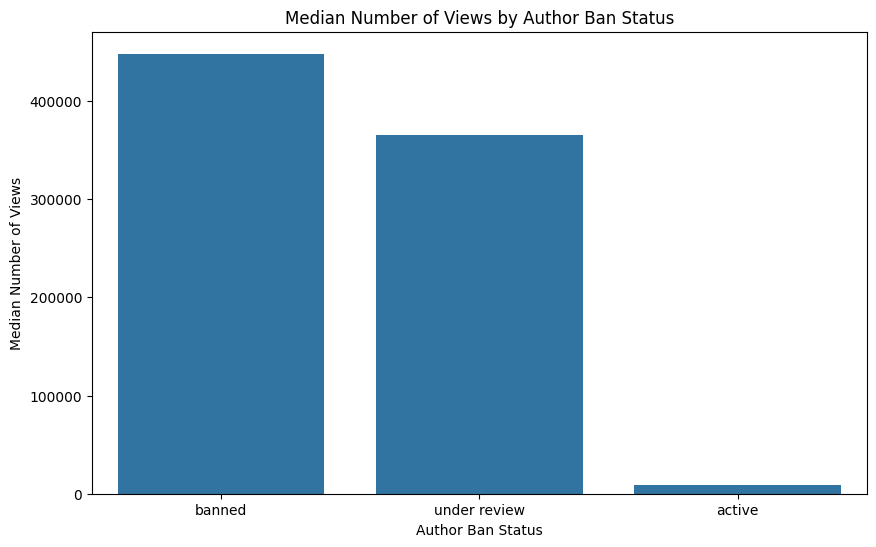

In [35]:
df_bar = df.groupby(["author_ban_status"])["video_view_count"].median().reset_index()
df_bar = df_bar.sort_values(by="video_view_count", ascending=False)
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_bar,x="author_ban_status",y="video_view_count")
plt.ylabel("Median Number of Views")
plt.xlabel("Author Ban Status")
plt.title("Median Number of Views by Author Ban Status")
plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

* The non active have far more views than the active. Because of that, the variable author ban status, specifically, the non-active, might be a good indicator of claim status.

In [36]:
medians_claim_view = df.groupby(["claim_status"])["video_view_count"].median()
medians_claim_view

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Creating a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos:

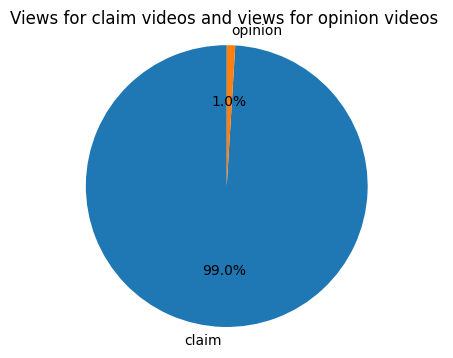

In [37]:
df_pie = df.groupby(["claim_status"])["video_view_count"].sum()
totals = df_pie.values
labels = df_pie.index
plt.figure(figsize=(4,4))
plt.pie(totals,labels=labels,autopct="%1.1f%%",startangle=90)
plt.axis("equal")
plt.title("Views for claim videos and views for opinion videos ")
plt.show()

**Question:** What do you notice about the overall view count for claim status?

* The claim videos hold the 99% of total views.
* The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The performed analysis indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

In [38]:
columnas_numericas = df.select_dtypes(include='number').columns.tolist()[3:]
def calculate_number_outliers(dframe,column_list):
    for column in column_list:
        IQR = dframe[column].quantile(0.75)-dframe[column].quantile(0.25)
        median = dframe[column].median()
        outlier_threshold = median + 1.5*IQR
        number_outliers = len(dframe[column][dframe[column]>outlier_threshold])
        print(f"Number of outliers: {column}: {number_outliers}")
calculate_number_outliers(df,columnas_numericas)

Number of outliers: video_view_count: 2343
Number of outliers: video_like_count: 3468
Number of outliers: video_share_count: 3732
Number of outliers: video_download_count: 3733
Number of outliers: video_comment_count: 3882


#### **Scatterplot**

Creating a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status':

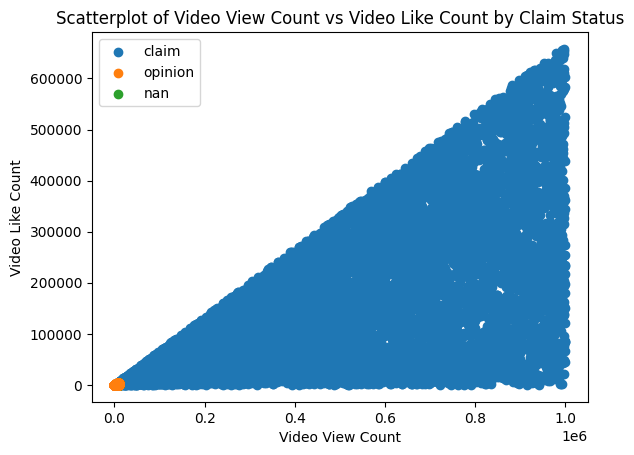

In [39]:
for status in df['claim_status'].unique():
    data_by_status = df[df['claim_status'] == status]
    plt.scatter(data_by_status['video_view_count'], data_by_status['video_like_count'], label=status)

plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.title('Scatterplot of Video View Count vs Video Like Count by Claim Status')

plt.legend()
plt.show()

Creating a scatterplot of ``video_view_count` versus `video_like_count` for opinions only:

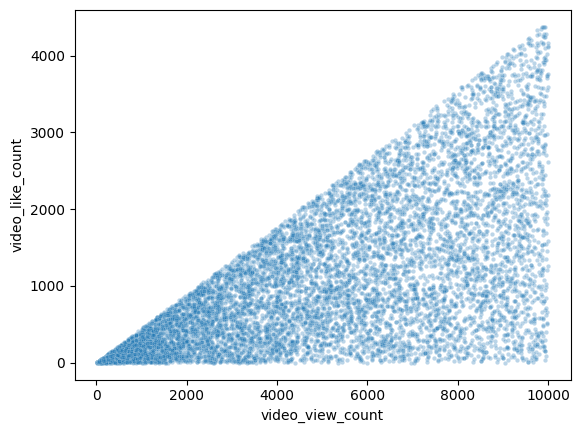

In [40]:
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()


## **PACE: Execute**

### **Task 5a. Results and evaluation**


Insights:

* *We examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others.*

* *We would like to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.*


* *The client would want to know the assumptions regarding what data might be predictive of claim_status.*



### **Task 5b. Conclusion**


* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*


* *Visualizations helps us understand that we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*